In [82]:
import pandas as pd
import glob
import os
import xlrd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sb

# City Dataset

In [7]:
city_dataset = pd.read_csv('D:\Data Glacier\DataSets\Files\City.csv')
city_dataset

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [8]:
city_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [9]:
#Converting user and population culum  into integer
city_dataset['Users']=city_dataset['Users'].replace('""','')
city_dataset['Population']=city_dataset['Population'].replace('""','')

city_dataset['Users']=city_dataset['Users'].replace(',','', regex=True).astype(int)
city_dataset['Population']=city_dataset['Population'].replace(',','', regex=True).astype(int)

In [10]:
city_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [11]:
#MAking a new for calculating users per city
city_dataset['Users %'] = (city_dataset['Users'] / city_dataset['Users'].sum()) *100 

In [12]:
city_dataset.head()

,City,Population,Users,Users %
0,NEW YORK NY,8405837,302149,23.414907
1,CHICAGO IL,1955130,164468,12.745377
2,LOS ANGELES CA,1595037,144132,11.169447
3,MIAMI FL,1339155,17675,1.369717
4,SILICON VALLEY,1177609,27247,2.111495


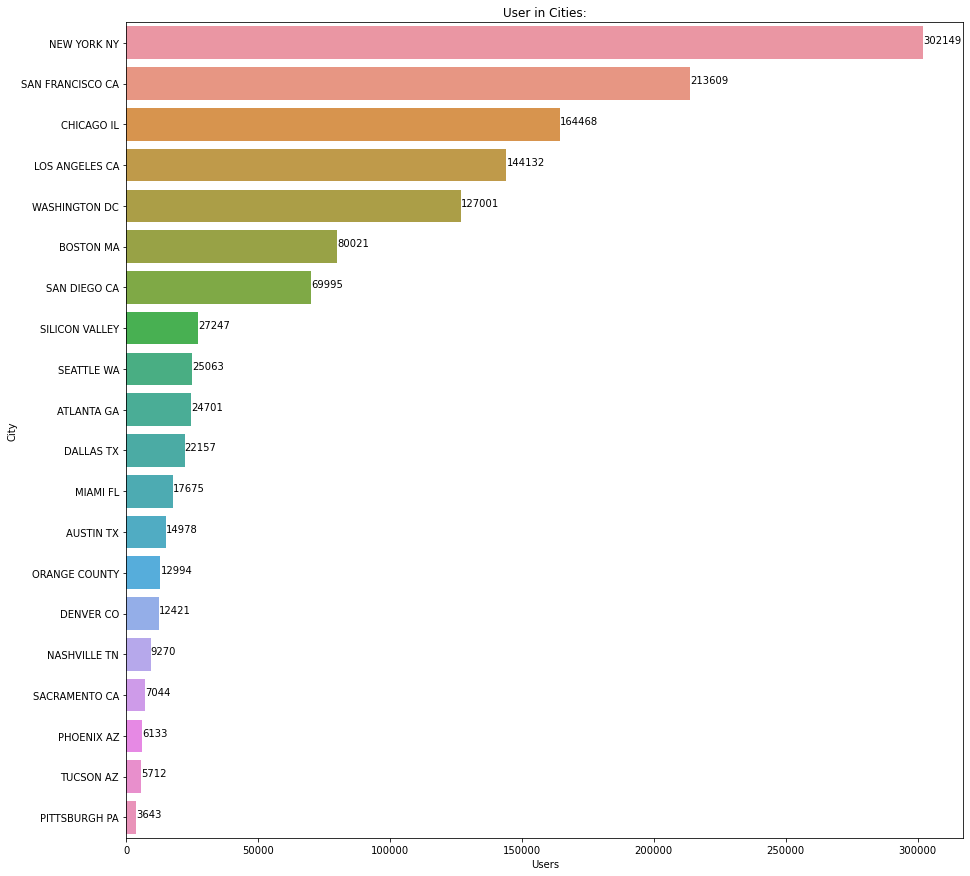

In [13]:
#Anlayzing users per city
User_city = pd.DataFrame(city_dataset.groupby('City')['Users'].sum().sort_values(ascending=False))
User_city.reset_index(inplace=True)

plt.figure(figsize=(15,15));
g=sb.barplot(x="Users", y="City", data=User_city);
for i, v in enumerate(User_city.Users):
    g.text(v, i,  str(int(v)))
plt.title('User in Cities:');
    


Newyork is the most populus city in the terms of users for both companies

<AxesSubplot:title={'center':'Number of users in the city'}, ylabel='Users'>

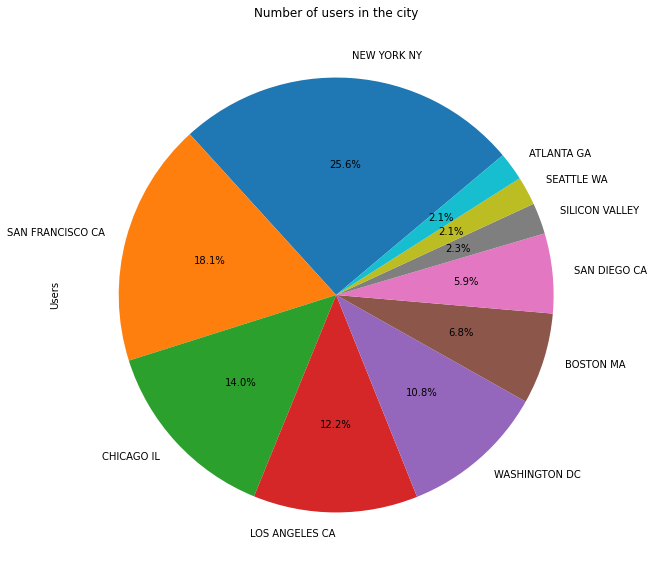

In [14]:
#Users in the city
plt.title("Number of users in the city")
city_dataset.groupby('City')['Users'].sum().sort_values(ascending=False).head(10).plot(kind='pie', startangle=40,figsize=(15,10),autopct='%1.1f%%')

# CAB Dataset 

In [15]:
cab_dataset= pd.read_csv('D:\Data Glacier\DataSets\Files\Cab_Data.csv')
cab_dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [16]:
cab_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [17]:
print("the cab data shape: ", cab_dataset.shape)

the cab data shape:  (359392, 7)


In [18]:
cab_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [19]:
cab_dataset.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

No missing values found in the Cab data

# The Transaction Dataset

In [20]:
transaction_dataset = pd.read_csv('D:\Data Glacier\DataSets\Files\Transaction_ID.csv')
transaction_dataset

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [21]:
print("The Transaction data shape:", transaction_dataset.shape)

The Transaction data shape: (440098, 3)


In [22]:
transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [23]:
transaction_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,440098.0,1.022006e+07,127045.493722,10000011.0,10110035.25,10220059.5,10330083.75,10440108.0
Customer ID,440098.0,2.361951e+04,21195.549816,1.0,3530.00,15168.0,43884.00,60000.0


In [24]:
transaction_dataset.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

No missing values found in the transaction csv file

In [25]:
#Merging the Transaction data and Cab data by Inner Join
trans_cab = pd.merge(transaction_dataset,cab_dataset, on=['Transaction ID'])
trans_cab

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,53286,Cash,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,52265,Cash,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,52175,Card,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [26]:
trans_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Customer ID     359392 non-null  int64  
 2   Payment_Mode    359392 non-null  object 
 3   Date of Travel  359392 non-null  int64  
 4   Company         359392 non-null  object 
 5   City            359392 non-null  object 
 6   KM Travelled    359392 non-null  float64
 7   Price Charged   359392 non-null  float64
 8   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 27.4+ MB


In [27]:
print("The shape of the merged dataset: ", trans_cab.shape)

The shape of the merged dataset:  (359392, 9)


# The Customer Dataset

In [28]:
customer_dataset=pd.read_csv("D:\Data Glacier\DataSets\Files\Customer_ID.csv")
customer_dataset

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [29]:
print("The shape of the customer dataset:", customer_dataset.shape)

The shape of the customer dataset: (49171, 4)


In [30]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [31]:
customer_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


In [32]:
customer_dataset.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

No missing values found in the dataset

In [33]:
#Merging the Transaction data and Customer Data
Combine_data = pd.merge(trans_cab,customer_dataset,on=['Customer ID'])
Combine_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454


In [34]:
Combine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 35.6+ MB


In [35]:
Combine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Customer ID,359392.0,1.919165e+04,21012.412463,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Age,359392.0,3.533670e+01,12.594234,18.0,2.500000e+01,33.00,4.200000e+01,65.00
Income (USD/Month),359392.0,1.504882e+04,7969.409482,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00


In [36]:
Combine_data.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

No missing valuses found in the dataset

In [37]:
print("The shape of the combine dataset:", Combine_data.shape)

The shape of the combine dataset: (359392, 12)


# Feature Selection of the Combine Dataset

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


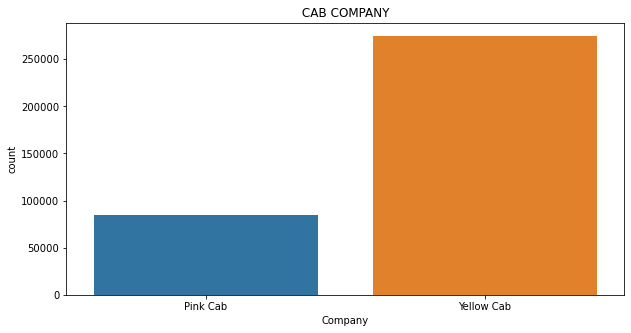

In [38]:
plt.figure(figsize=(10,5))
sb.countplot(Combine_data.Company)
plt.title(" CAB COMPANY ")
plt.show()

The result shows that most users prefer Yellow cab for their travelling

In [39]:
#Calculating the profit and making a new column profit in the dataframe
Combine_data['Profit']= Combine_data['Price Charged']-Combine_data['Cost of Trip']
Combine_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600


In [40]:
# Now grouping the Age group

labels = ["{0} - {1}".format(i, i + 9) for i in range(10, 70, 10)]
Combine_data["Age group"] = pd.cut(Combine_data.Age, range(10,75, 10), right=False, labels=labels)
Combine_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


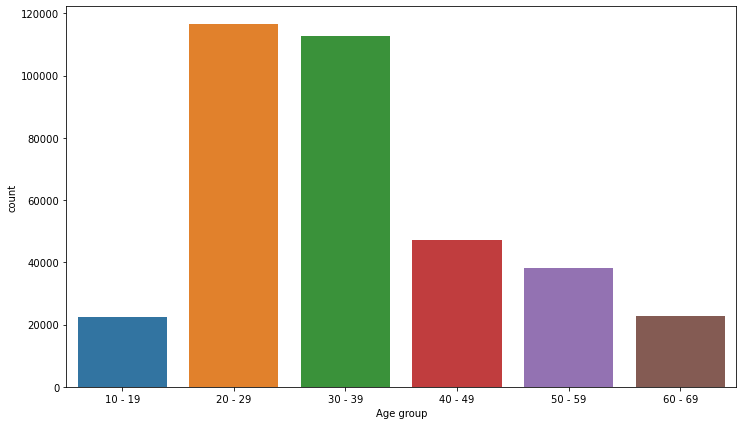

In [41]:
plt.figure(figsize=(12,7))
sb.countplot(Combine_data["Age group"])
plt.show()

The above graph result show that Age group 20-29 uses the cab service

In [51]:
def plot_figure2(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.bar(stacked = True, figsize = (x,y),width=0.5)
    xt = plt.xticks(rotation=0)
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()

        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()
                

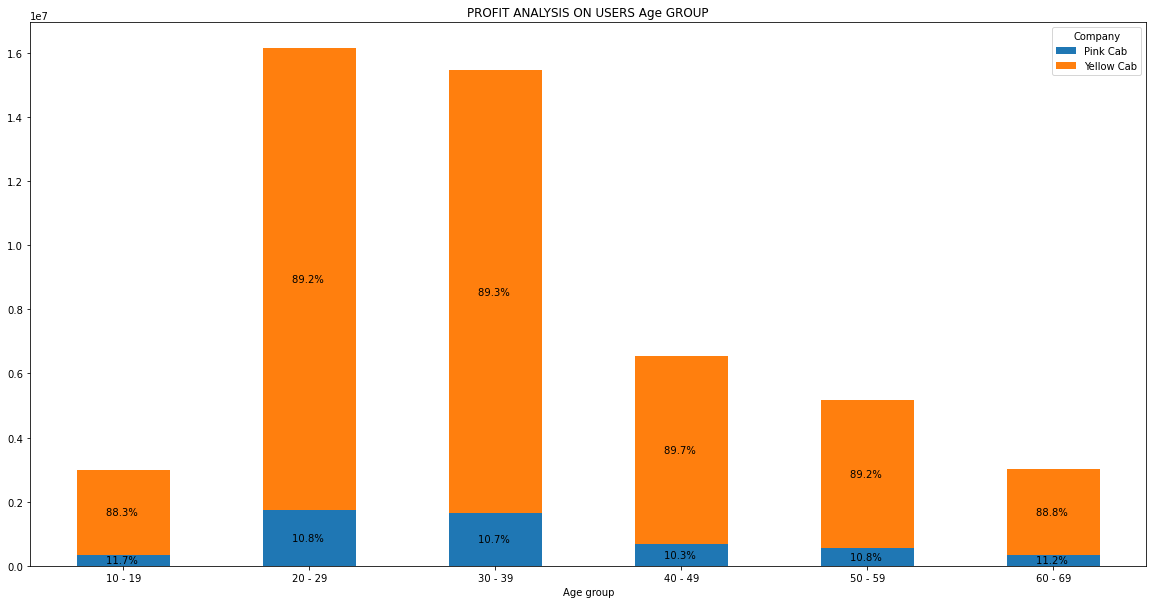

In [54]:
pivot_age_profit = Combine_data.pivot_table(index = ["Age group"], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure2(pivot_age_profit, "PROFIT ANALYSIS ON USERS Age GROUP",0.45,20,10)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


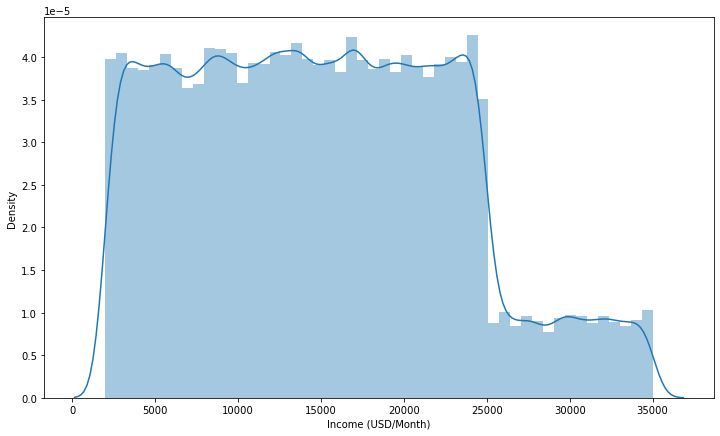

In [58]:
# Visualize the Income of Users in US
plt.figure(figsize=(12,7))
sb.distplot(Combine_data["Income (USD/Month)"])
plt.show()

Most users have the income between 2000 to 24000

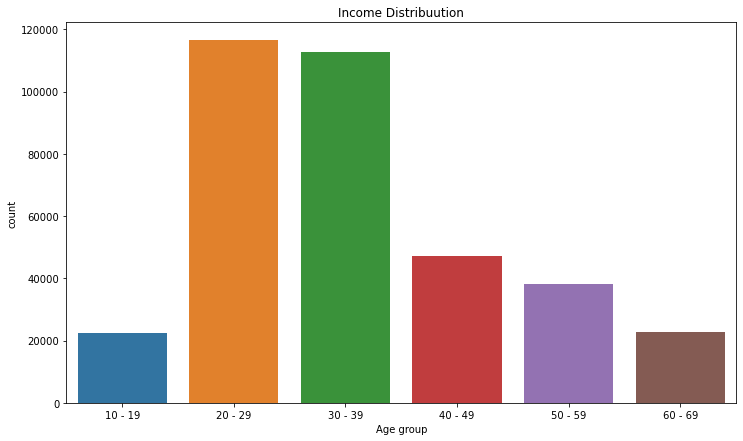

In [61]:
plt.figure(figsize=(12,7))
sb.countplot(Combine_data["Age group"],palette="tab10")
plt.title("Income Distribuution")
plt.show()

In [66]:
labelx = ["{0} - {1}".format(i, i + 3000) for i in range(2000, 35000, 5000)]
Combine_data["Income Grouped"] = pd.cut(Combine_data["Income (USD/Month)"], range(2000,40000,5000), right=False, labels=labelx)
Combine_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income Grouped
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29,7000 - 10000
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29,7000 - 10000
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000


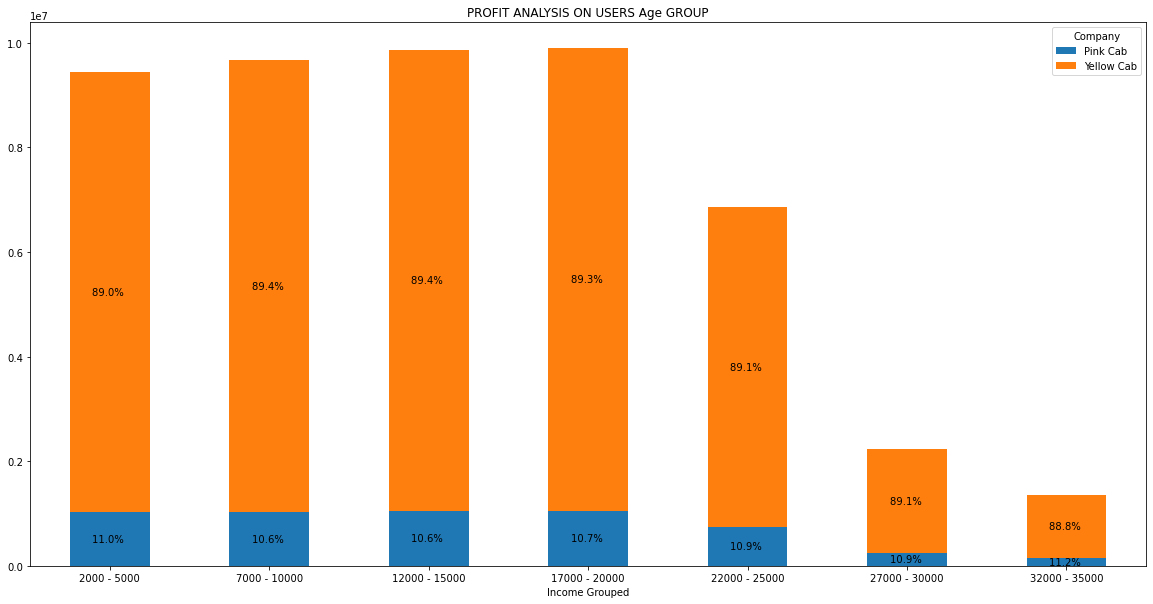

In [68]:
pivot_age_profit = Combine_data.pivot_table(index = ["Income Grouped"], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure2(pivot_age_profit, "PROFIT ANALYSIS ON USERS Age GROUP",0.45,20,10)

Yellow Cab company is making more profit based on User income

<AxesSubplot:title={'center':'Cab User Gender'}, ylabel='Profit'>

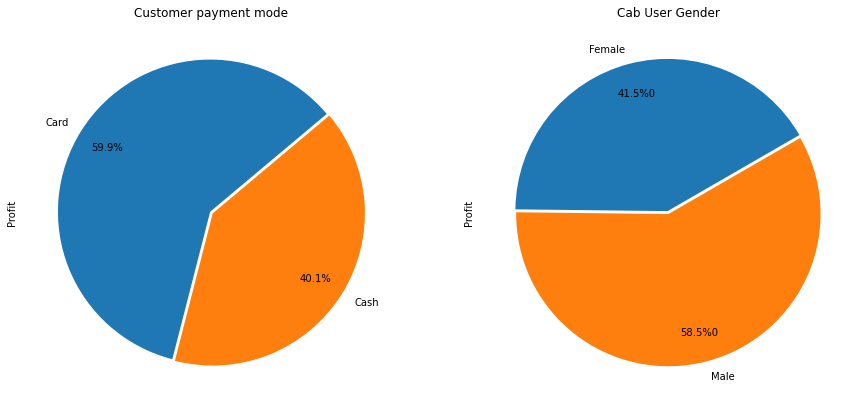

In [73]:
#Visualize Cutomer payment mode and Gender
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Customer payment mode")
Combine_data.groupby("Payment_Mode")['Profit'].sum().plot(kind='pie',y='Payment_Mode',startangle=40, figsize=(15,7),autopct="%1.1f%%",explode=[0.01]*2,pctdistance=0.8)
plt.subplot(1,2,2)
plt.title("Cab User Gender")
Combine_data.groupby("Gender")['Profit'].sum().plot(kind='pie',y='GENDER',startangle=30, figsize=(15,7),autopct="%1.1f%%0",explode=[0.01]*2,pctdistance=0.8)


Mostly customers users paid by Card and Male users are more as compared to female for CAB company

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


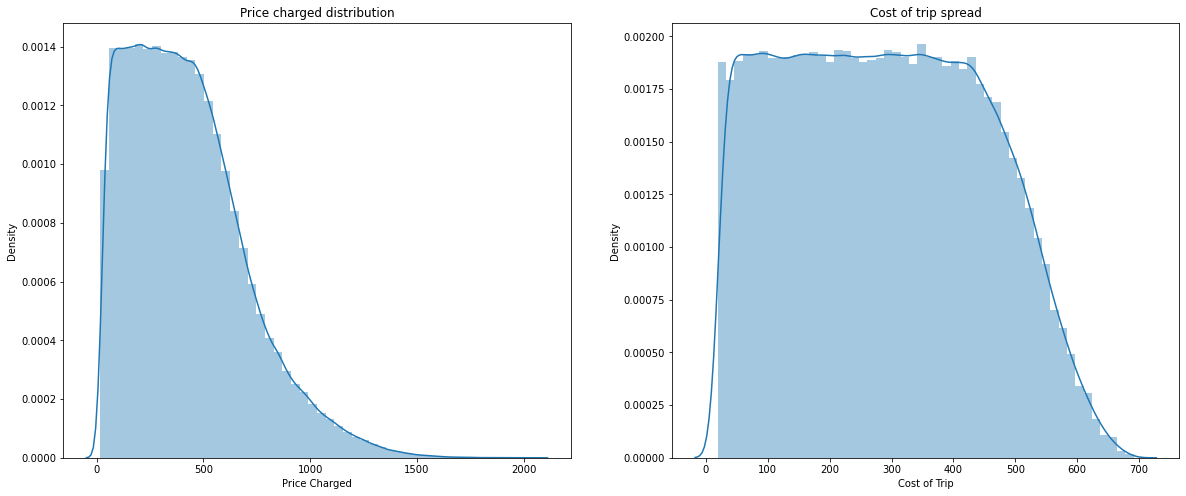

In [78]:
# Visualize the price distribution from the Combine dataset
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Price charged distribution")
sb.distplot(Combine_data['Price Charged'])

plt.subplot(1,2,2)
plt.title('Cost of trip spread')
sb.distplot(Combine_data["Cost of Trip"])
plt.show()

The above result shows a clear difference between both companies in their price charged.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


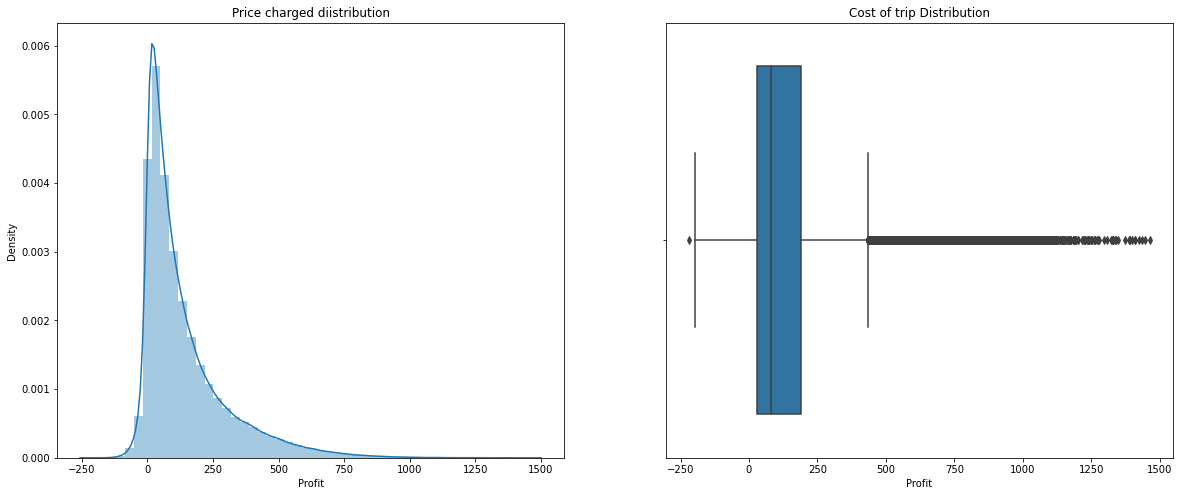

In [79]:
#Visualize the profit of both companies from combine dataset
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Price charged diistribution")
sb.distplot(Combine_data['Profit'])

plt.subplot(1,2,2)
plt.title("Cost of trip Distribution")
sb.boxplot(Combine_data['Profit'])
plt.show()

<AxesSubplot:title={'center':'Profit per Company'}, ylabel='Profit'>

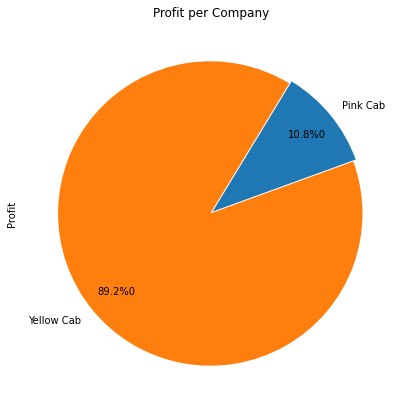

In [80]:
# Analyze each company profit

plt.title("Profit per Company")
Combine_data.groupby("Company")['Profit'].sum().plot(kind='pie',y='Company',startangle=20, figsize=(15,7),autopct="%1.1f%%0",explode=[0.01]*2,pctdistance=0.8)

The results show yellow Cab comapany has the largest profit share.

In [85]:
#Changing the Date of travel column into real date format
Combine_data['Date of Travel'] = Combine_data['Date of Travel'].apply(lambda s:xlrd.xldate.xldate_as_datetime(s,0))
Combine_data['Travel_year_month'] = pd.to_datetime(Combine_data['Date of Travel']).dt.to_period('M')
Combine_data['Travel_year']=pd.DatetimeIndex(Combine_data['Date of Travel']).year
Combine_data['Travel_Month']=pd.DatetimeIndex(Combine_data['Date of Travel']).month

In [86]:
Combine_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income Grouped,Data of Travel,Travel_year_month,Travel_year,Travel_Month
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29,7000 - 10000,2016-01-08,2016-01,2016,1
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07-21,2018-07,2018,7
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11-23,2018-11,2018,11
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29,7000 - 10000,2016-01-06,2016-01,2016,1
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04-21,2018-04,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01-07,2018-01,2018,1
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01-03,2018-01,2018,1
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01-04,2018-01,2018,1
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01-06,2018-01,2018,1


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


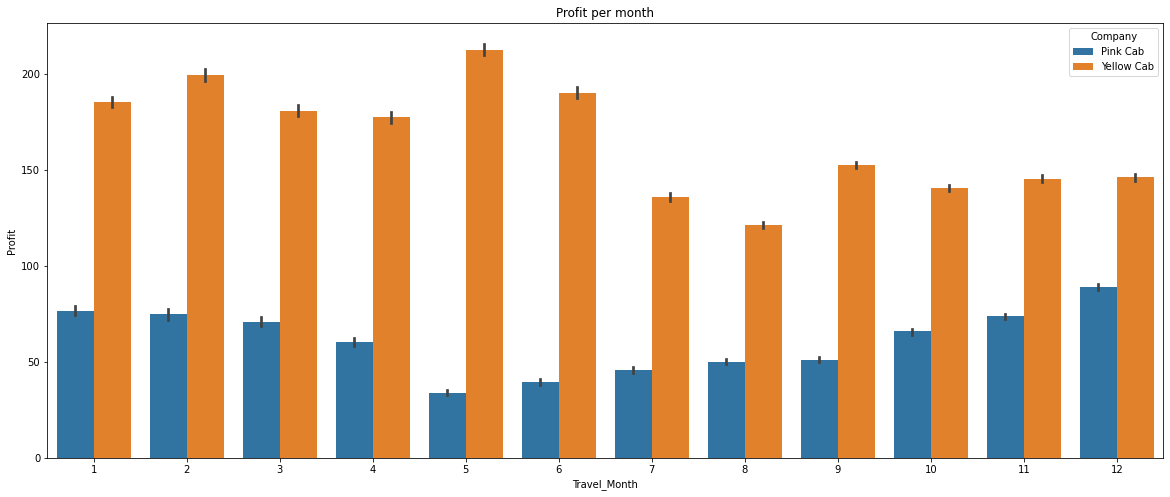

In [87]:
#Now visualize the profit according to year and month
plt.figure(figsize=(20,8))
ax=sb.barplot(Combine_data['Travel_Month'],Combine_data["Profit"], hue='Company',data=Combine_data)
plt.title('Profit per month')
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


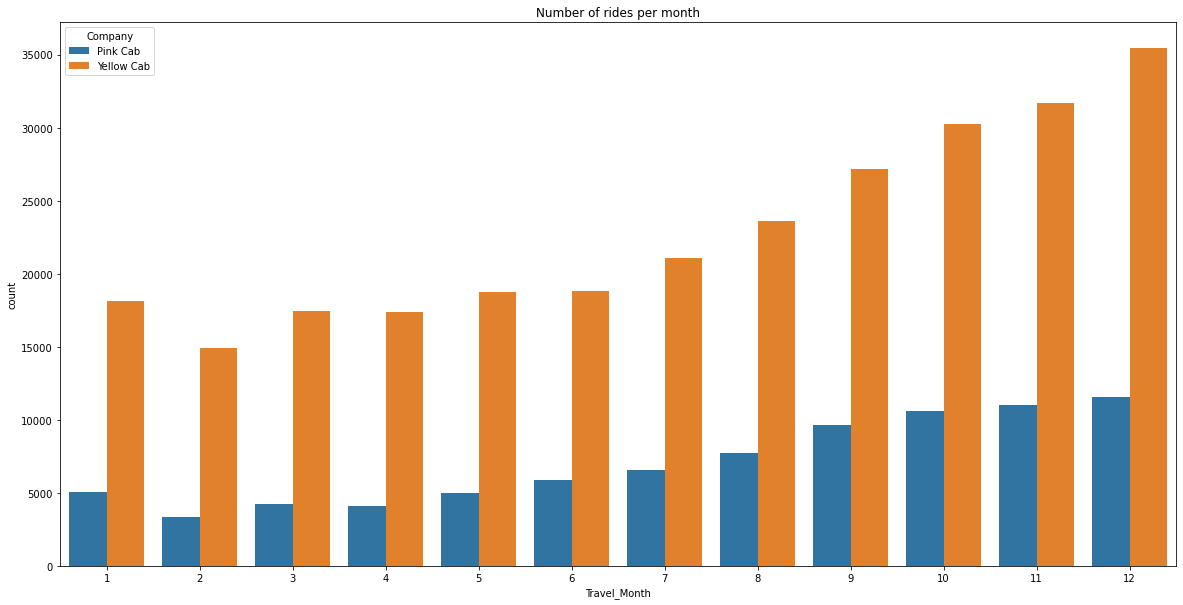

In [88]:
plt.figure(figsize=(20,10))
sb.countplot(Combine_data['Travel_Month'],hue='Company',data=Combine_data)
plt.title('Number of rides per month')
plt.show()

In [90]:
def plot_figure3(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))

    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label =  " " + str(pivot_table.loc[i][j].astype('int64')) + ""
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

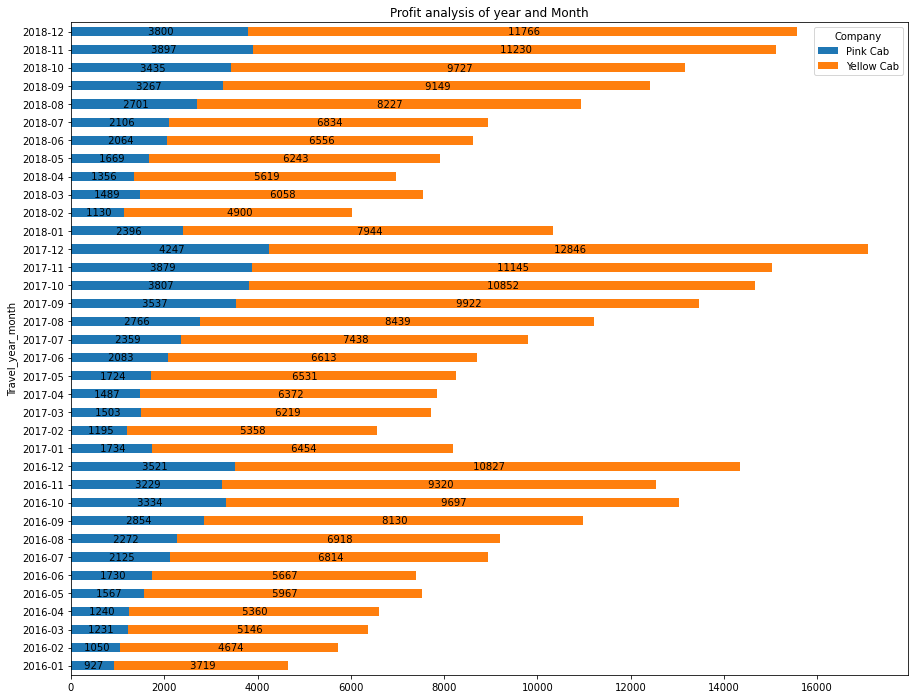

In [91]:
Travel_Monthly_data= Combine_data.pivot_table(index=['Travel_year_month'], columns='Company', values='Profit',aggfunc='count')
plot_figure3(Travel_Monthly_data, 'Profit analysis of year and Month',15,15,12)

Both Companies has highest profit at the last month of the year (December)

In [95]:
def plot_figure1(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

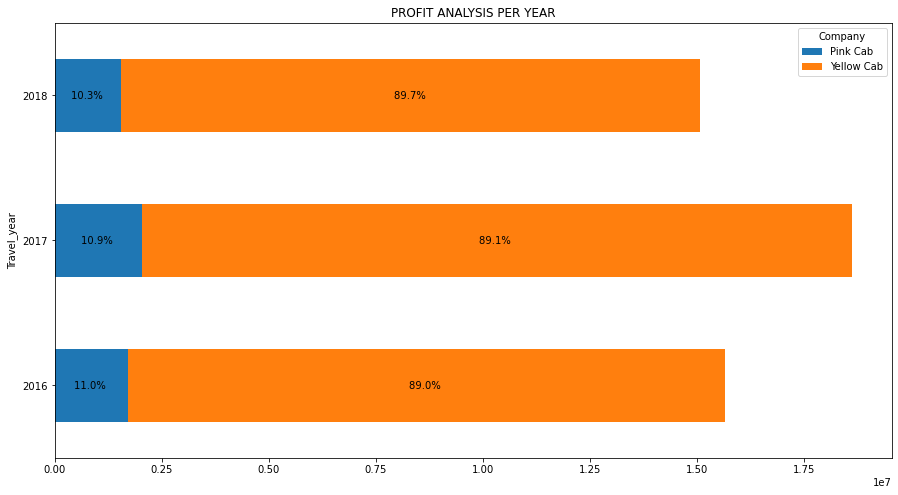

In [100]:
Year_profit = Combine_data.pivot_table(index = ['Travel_year'], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure1(Year_profit, "PROFIT ANALYSIS PER YEAR",10,15,8)

The result show Yeloow cab company has the largest market share

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


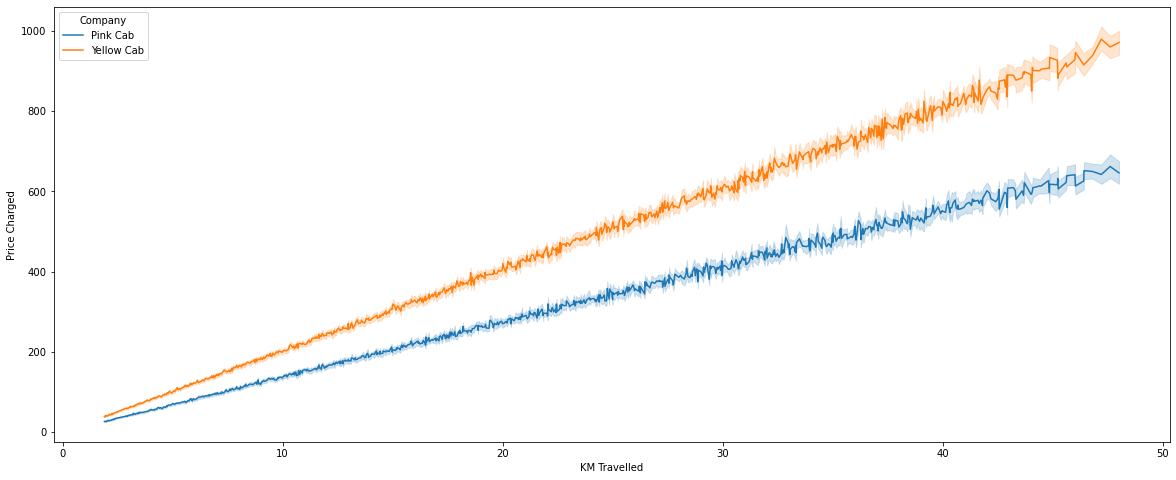

In [102]:
plt.figure(figsize=(20,8))
sb.lineplot(Combine_data['KM Travelled'], Combine_data['Price Charged'],hue='Company', data=Combine_data)
plt.show()

In [103]:
#Let's combine the KM travelled

label = ["{0} - {1}".format(i, i + 9) for i in range(0, 50, 10)]
Combine_data['KM travelled'] = pd.cut(Combine_data['KM Travelled'], range(0,55,10), right=False, labels=label)
Combine_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income Grouped,Data of Travel,Travel_year_month,Travel_year,Travel_Month,KM travelled
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29,7000 - 10000,2016-01-08,2016-01,2016,1,30 - 39
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07-21,2018-07,2018,7,20 - 29
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11-23,2018-11,2018,11,40 - 49
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29,7000 - 10000,2016-01-06,2016-01,2016,1,20 - 29
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04-21,2018-04,2018,4,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01-07,2018-01,2018,1,10 - 19
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01-03,2018-01,2018,1,10 - 19
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01-04,2018-01,2018,1,10 - 19
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01-06,2018-01,2018,1,0 - 9


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


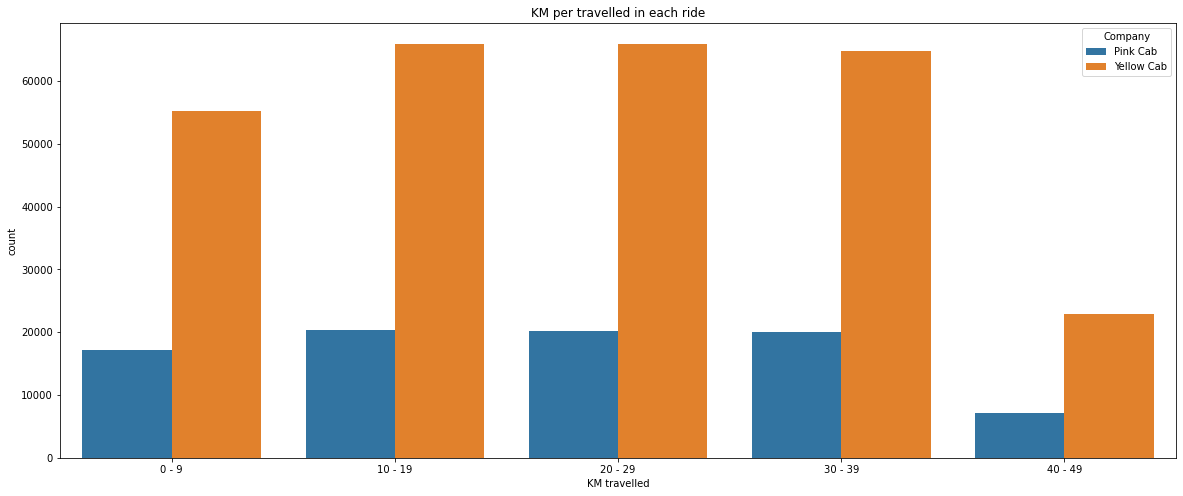

In [107]:
#Visulalize the KM 

plt.figure(figsize=(20,8))
sb.countplot(Combine_data['KM travelled'],hue='Company',data=Combine_data)
plt.title('KM per travelled in each ride')
plt.show()

Mostly users ride 10 to 39 KM. They prefer Yellow cab company for their rides which comprises of approx. 76% an d onlr 24% users prefers Pink can company for their rides. 

<AxesSubplot:ylabel='Profit'>

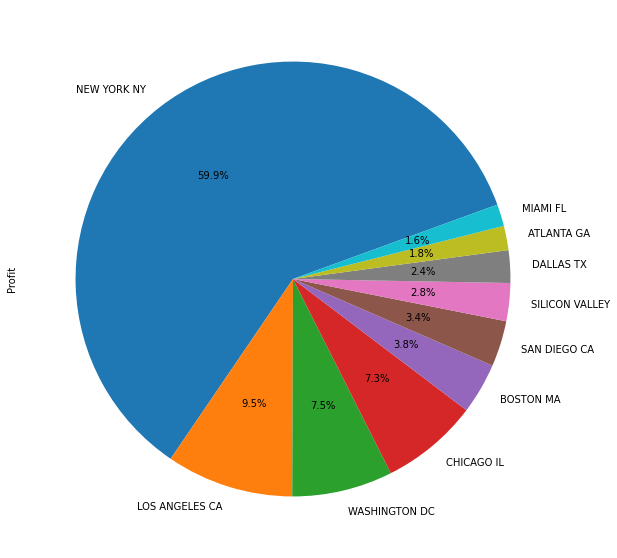

In [114]:
#Top 10 Cities with most profit
Combine_data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=20,figsize=(15,10),autopct='%1.1f%%')

New york has the 60% of profit that means it has the large number of users.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


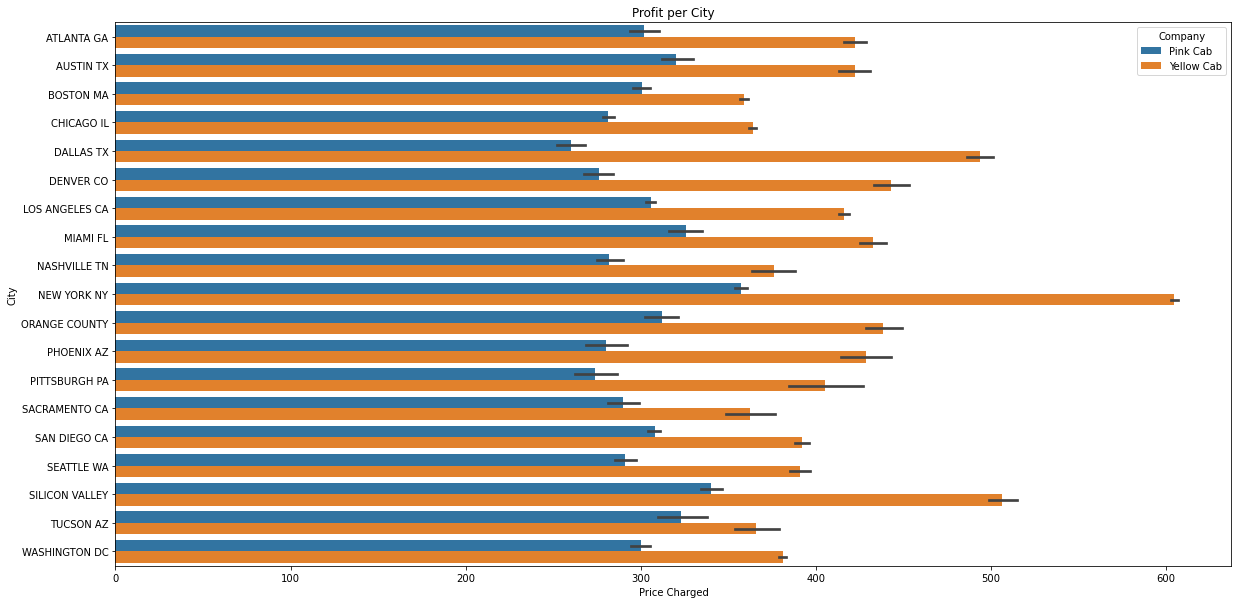

In [122]:
#Analyze the difference the price charged by companies in different cities

plt.figure(figsize=(20,10))
sb.barplot(Combine_data['Price Charged'],Combine_data['City'],hue = 'Company', data=Combine_data)
plt.title('Profit per City')
#xt = plt.xticks(rotation=90)
plt.show()


The Chart shows yellow cab companmy charges more ia al the cties and in big cities it charges more depending ion the large number of users and the profit of Pink cab company looks constant as compare to yellow cab company which has a wider variable range of profit.

In [127]:
def plot_figure2(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

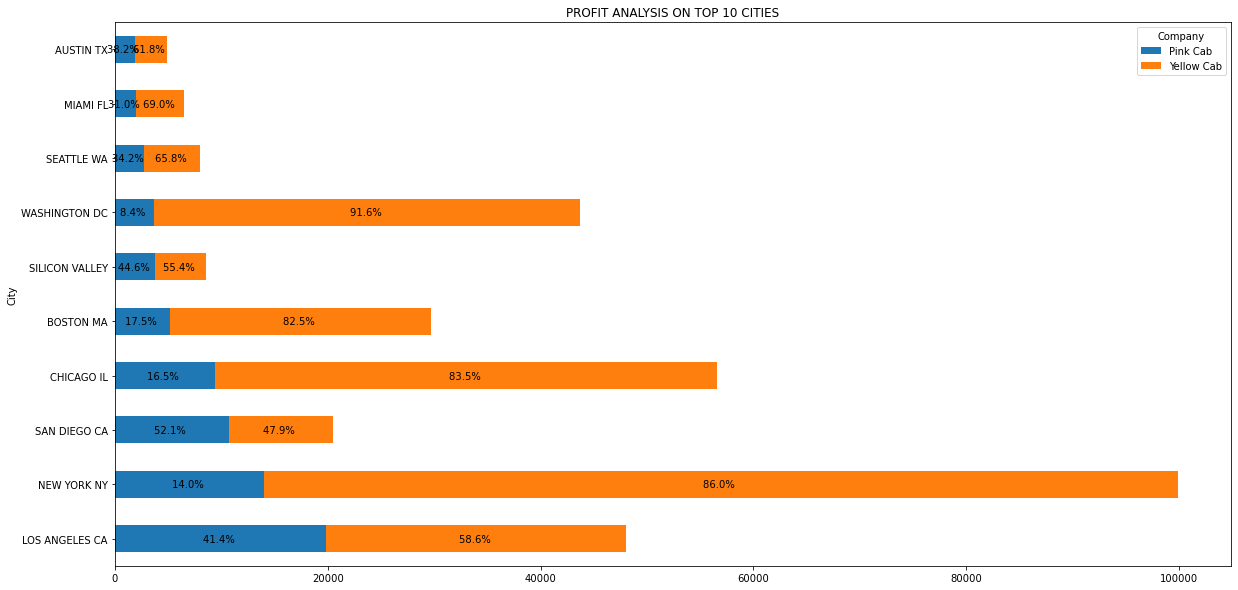

In [129]:

# TOP 10 CITIES IN TERMS OF PROFIT

City_profit = Combine_data.pivot_table(index = ['City'], columns = 'Company', values = 'Profit', aggfunc = 'count')
City_profit=City_profit.sort_values("Pink Cab",ascending=False).head(10)
plot_figure2(City_profit, "PROFIT ANALYSIS ON TOP 10 CITIES",0.45,20,10)

The results clearly show that Yellow cab company is making more profit with the most number of users in all the top 10 cities  

# Pink Cab Company

In [130]:
#Pink Cab compoany profit ratio
Pink_company = Combine_data[Combine_data['Company']=='Pink Cab']
Pink_company

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income Grouped,Data of Travel,Travel_year_month,Travel_year,Travel_Month,KM travelled
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,57.315,20 - 29,7000 - 10000,2016-01-08,2016-01,2016,1,30 - 39
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,23.666,20 - 29,7000 - 10000,2016-01-06,2016-01,2016,1,20 - 29
6,10395626,27703,Card,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,Male,27,9237,25.096,20 - 29,7000 - 10000,2018-10-27,2018-10,2018,10,10 - 19
7,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,27.568,50 - 59,7000 - 10000,2016-01-02,2016-01,2016,1,0 - 9
11,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,25.798,20 - 29,22000 - 25000,2016-01-07,2016-01,2016,1,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359331,10437193,47760,Card,2018-01-05,Pink Cab,SACRAMENTO CA,31.03,436.06,344.433,Male,47,8823,91.627,40 - 49,7000 - 10000,2018-01-05,2018-01,2018,1,30 - 39
359332,10437278,18620,Card,2018-01-02,Pink Cab,SAN DIEGO CA,26.73,343.83,304.722,Male,27,2876,39.108,20 - 29,2000 - 5000,2018-01-02,2018-01,2018,1,20 - 29
359333,10437570,14974,Cash,2018-01-05,Pink Cab,SILICON VALLEY,22.23,386.13,264.537,Male,51,8020,121.593,50 - 59,7000 - 10000,2018-01-05,2018-01,2018,1,20 - 29
359334,10437576,41135,Card,2018-01-05,Pink Cab,TUCSON AZ,35.96,461.77,381.176,Female,24,14269,80.594,20 - 29,12000 - 15000,2018-01-05,2018-01,2018,1,30 - 39


In [133]:
Pink_income = Pink_company['Profit'].sum()
print('The Profit of the pink cab company is : ', round(Pink_income,2))

The Profit of the pink cab company is :  5307328.32


In [144]:
Pink_Gross_ratio = (Pink_company['Price Charged'].sum()-Pink_company['Cost of Trip'].sum())/Pink_company['Price Charged'].sum()*100
print('The ratio of the profit of pink cab company is:', round(Pink_Gross_ratio,2))

The ratio of the profit of pink cab company is: 20.16


In [138]:
Profit_each_ride = Pink_company['Profit'].sum()/len(Pink_company['KM travelled'])
print(" Pink cab campany Profit per ride is : ",round(Profit_each_ride,2))

 Pink cab campany Profit per ride is :  62.65


# Yellow Cab Company 

In [139]:
Yellow_company = Combine_data[Combine_data['Company']=='Yellow Cab']
Yellow_company

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income Grouped,Data of Travel,Travel_year_month,Travel_year,Travel_Month,KM travelled
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07-21,2018-07,2018,7,20 - 29
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11-23,2018-11,2018,11,40 - 49
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04-21,2018-04,2018,4,30 - 39
5,10324737,27703,Cash,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,50.8912,20 - 29,7000 - 10000,2018-05-04,2018-05,2018,5,0 - 9
8,10079404,28712,Card,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,210.0920,50 - 59,7000 - 10000,2016-09-21,2016-09,2016,9,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01-07,2018-01,2018,1,10 - 19
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01-03,2018-01,2018,1,10 - 19
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01-04,2018-01,2018,1,10 - 19
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01-06,2018-01,2018,1,0 - 9


In [146]:
Yellow_income = Yellow_company['Profit'].sum()
print('The Profit of the Yellow cab company is : ', round(Yellow_income,2))

The Profit of the Yellow cab company is :  44020373.17


In [143]:
Yellow_Gross_ratio = (Yellow_company['Price Charged'].sum()-Yellow_company['Cost of Trip'].sum())/Yellow_company['Price Charged'].sum()*100
print('The ratio of the profit of Yellows  cab company is:', round(Yellow_Gross_ratio,2))

The ratio of the profit of Yellows  cab company is: 34.98


In [149]:
Yellow_each_ride = Yellow_company['Profit'].sum()/len(Yellow_company['KM travelled'])
print(" Yellow cab campany Profit on each ride is : ",round(Yellow_each_ride,2))

 Yellow cab campany Profit on each ride is :  160.26
